<a href="https://colab.research.google.com/github/elmox0818/ai_learning/blob/master/2020_02_03%E3%83%A1%E3%83%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 正規分布

## 平均値

$$
  \mu = \frac{x_1 + x_2 + \cdots + x_n}{n}
  = \frac{1}{n}\sum_{k=1}^{n} x_k
$$


In [2]:
import numpy as np

x = np.array([55,45,60,40])
np.average(x)

50.0

## 分散

値のばらつき具合を表す

$$
  V = \frac{1}{n}\sum_{k=1}^{n}(x_k - \mu)^2
$$

In [3]:
import numpy as np

x = np.array([55,45,60,40])
np.var(x)

62.5

## 標準偏差

値のばらつき具合、分散よりも直感的な数値を表す。

$$
  \delta = \sqrt{V} = \sqrt{\frac{1}{n}\sum_{k=1}^{n}(x_k-\mu)^2}
$$



> 確率密度関数 
>横軸はある値を、縦軸は値の頻度や確率を表す。
>μは平均値で分布中央、δは標準偏差で分布の広がり具合を表す。

$$
  y = \frac{1}{\delta\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\delta^2})
$$

μ=0, δ=1とすると

$$
  y = \frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})
$$



In [4]:
import numpy as np

x = np.array([55,45,60,40])
np.std(x)

7.905694150420948

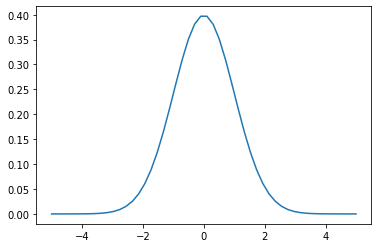

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1 # 標準偏差
mu = 0 # 平均値

x = np.linspace(-5, 5)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2)) # 確率密度関数

plt.plot(x,y)
plt.show()

# Pythonにおける正規表現

## subによる置換

re.subにより文字列の置換

In [10]:
import re

s = "私は柴犬が好きです。"

# 単体置換
s = re.sub("柴犬", "シャムネコ", s)
print(s)

s = "私は黒犬と白猫が好きです。"

# 複数置換
s = re.sub("[犬猫]", "馬", s)
print(s)

s = "私は柴犬犬犬犬犬犬犬犬犬犬が好きです"

# 繰り返し
s = re.sub("犬+", "犬", s)
print(s)

私はシャムネコが好きです。
私は黒馬と白馬が好きです。
私は柴犬が好きです


## ルビの除去

【】などを除去する方法

【^】]+の箇所で】以外の文字の繰り返しを意味する。
【[^】]+】は【と】の間に】以外の文字が複数ある個所を表す。

In [12]:
import re

s = "私は柴犬【しばいぬ】が好きです。"

s = re.sub("【[^】]+】", "", s)
print(s)

s = "白馬【はくば】に乗って、草原【そうげん】をかける"
s = re.sub("【[^】]+】", "", s)
print(s)

私は柴犬が好きです。
白馬に乗って、草原をかける


# コーパスの前処理

In [27]:
!ls nlp_bot/Section_6/

gingatetsudono_yoru.txt


In [30]:
with open("nlp_bot/Section_6/gingatetsudono_yoru.txt", mode="r", encoding="utf-8") as f:
  data = f.read()
line1 = data.split("\n")[0]
print(line1)

「ではみなさんは、そういうふうに川だと云《い》われたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。」先生は、黒板に吊《つる》した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指《さ》しながら、みんなに問《とい》をかけました。


読み込んだ小説のデータから正規表現を用いてルビなどを除去。
その後、文章ごとにリストに格納してpickleを使って保存。

In [53]:
import re
import pickle

data = re.sub("≪[^≫]+≫", "", data) # ルビの削除
data = re.sub("[《≪]", "", data) # ルビの削除
data = re.sub("［[^］]+］", "", data) # 読みの注意の削除
data = re.sub("[｜ 　「」\n]", "", data) # | と全角半角スペース、「」と改行の削除
separator = "。"
data_list = data.split(separator)
data_list.pop() # 最後は空の文字列なので削除
data_list = [x+separator for x in data_list] # 文章の最後に。を追加

print(data_list[0])
with open("data.pickle", mode="wb") as f:
  pickle.dump(data_list, f)

ではみなさんは、そういうふうに川だと云いわれたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。


保存されているか確認する。

In [54]:
with open("data.pickle", mode="rb") as f:
  data_list = pickle.load(f)
print(data_list[0])

ではみなさんは、そういうふうに川だと云いわれたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。


# 形態素解析

言葉の意味で文章を分割する。

janomeを使う。インストールは下記
> pip install janome

In [47]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

s = "すもももももももものうち"

word_list = t.tokenize(s, wakati=True)
print(word_list)

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']


## 保存したテキストを分かち書き

In [55]:
with open("data.pickle", mode="rb") as f:
  data_list = pickle.load(f)

for index, sentence in enumerate(data_list):
  if index == 1:
    print(t.tokenize(sentence, wakati=True))

['先生', 'は', '、', '黒板', 'に', '吊', 'つるし', 'た', '大きな', '黒い', '星座', 'の', '図', 'の', '、', '上', 'から', '下', 'へ', '白く', 'けぶっ', 'た', '銀河', '帯', 'の', 'よう', 'な', 'ところ', 'を', '指さし', 'ながら', '、', 'みんな', 'に', '問', 'とい', 'を', 'かけ', 'まし', 'た', '。']


## 単語の出現回数をカウント

In [56]:
import collections

t = Tokenizer()

words = []
for sentence in data_list:
  words += t.tokenize(sentence, wakati=True) # listに全ての単語を入れる

c = collections.Counter(words)
print(c)

Counter({'の': 1251, '。': 1120, '、': 986, 'た': 946, 'て': 882, 'に': 758, 'は': 625, 'を': 560, 'が': 520, 'まし': 455, 'と': 291, 'も': 238, 'で': 214, 'よう': 208, 'し': 190, 'ジョバンニ': 189, 'か': 185, 'な': 171, 'から': 169, 'です': 160, 'その': 156, 'だ': 153, 'い': 148, 'ん': 142, 'へ': 126, 'う': 118, 'でし': 111, 'いる': 106, 'ない': 103, 'カムパネルラ': 101, '人': 101, 'もう': 93, '見': 91, 'そう': 81, 'や': 80, 'よ': 79, '云い': 77, 'なっ': 75, 'ながら': 70, '方': 66, 'たり': 60, 'ぼく': 59, 'たち': 58, 'それ': 56, 'また': 56, '中': 55, 'みんな': 54, '来': 53, '二': 51, 'ます': 48, '何': 47, 'ほんとう': 45, '一': 44, '鳥': 44, 'どこ': 43, 'ね': 43, 'れ': 42, '立っ': 42, 'そして': 41, 'ああ': 41, 'けれども': 40, '見え': 40, 'こと': 39, '窓': 39, '汽車': 39, '前': 38, 'ませ': 38, '小さな': 38, 'いま': 38, 'あの': 38, 'という': 37, '眼': 37, 'まるで': 36, 'ず': 36, '行っ': 36, '川': 35, 'とき': 35, 'ねえ': 35, 'この': 34, '僕': 33, 'もの': 32, '大きな': 32, 'わ': 32, 'ある': 31, 'まで': 31, 'そら': 31, '行く': 31, 'たくさん': 30, 'お': 30, 'だろ': 30, 'なり': 29, '水': 29, 'ぼんやり': 28, '向う': 28, '青年': 28, '白い': 27, 'いい': 27, 'こっち': 2

# word2vecの概要

## one-hot表現

文章をベクトル化

  e.g.

  すもも も もも も もも の うち

  ||すもも|も|もも|の|うち|
  |---|---|---|---|---|---|
  |ID|0|1|2|3|4|

  > 「すもも」は [1 0 0 0 0]  
  > 「も」は [0 1 0 0 0]


## 分散表現

単語間の関係性や類似度に基づくベクトルで単語を表現
> 200要素程度のベクトルで表現

## word2vecとは

- 分散表現を作成することができる。
- CBOWか、skip-gramというニューラルネットワークが用いられる。
- CBOWは周りの単語から特定の単語を予想、skip-gramは一つの単語から周りの単語を予想

## doc2vec

- word2vecの文章へ拡張版
- dmpvかDBOWというニューラルネットワークが用いられる。
- onehot表現の文書IDを入力層に含める。

# word2vecでの学習


In [0]:
from gensim.models import word2vec

# size : 中間層のニューロン数
# min_count : この値以下の出現回数の単語を無視
# window : 対象単語を中心とした前後の単語数
# iter : epochs数
# sg : skip-gramを使うかどうか 0:CBOW 1:skip-gram
model = word2vec.Word2Vec(data_list,
                          size=100,
                          min_count=5,
                          window=5,
                          iter=20,
                          sg = 0)

In [59]:
print(model.wv.vectors.shape) # 分散表現の形状
print(model.wv.vectors) # 分散表現

# (427, 100)は単語数、中間層のニューロン数

(427, 100)
[[ 0.11323837 -0.09959874  0.08260114 ...  0.5412286   0.2127491
   0.10402833]
 [ 0.06485976  0.10506245 -0.14574328 ...  0.31220287  0.10628448
  -0.46253544]
 [ 0.18034074  0.29368228 -0.16179486 ...  0.07489827  0.20305867
  -0.2877504 ]
 ...
 [ 0.06341001  0.0374797  -0.06044163 ...  0.20664063  0.06052839
  -0.10745423]
 [ 0.06220559  0.02913703 -0.06832641 ...  0.3177256  -0.02576601
  -0.15959825]
 [ 0.03829075  0.01370631 -0.04303578 ...  0.253046   -0.09430012
  -0.09679323]]


In [61]:
print(len(model.wv.index2word)) # 語彙の数
print(model.wv.index2word[:10]) # 最初の10単語

427
['の', 'い', 'た', 'し', '。', 'て', 'っ', 'ま', '、', 'う']


In [63]:
print(model.wv.vectors[0]) # 最初のベクトル
print(model.wv.__getitem__("の")) # 最初の単語「の」のベクトル

# 比較してみると同じ内容

[ 0.11323837 -0.09959874  0.08260114  0.4122717  -0.01296563 -0.16620994
  0.57949233  0.18216312 -0.39427075  0.18329181  0.04115144 -0.46303362
  0.4000141  -0.03563368  0.28833938  0.18535472  0.3263829  -0.623888
 -0.2700665  -0.02933412  0.27281895  0.00266816 -0.2333858   0.24917844
  0.10447097 -0.5358753   0.3246491  -0.27420458 -0.40509263  0.20537242
  0.12433947  0.37597364 -0.14543201 -0.16314425  0.14193368  0.22872667
  0.3634936  -0.13305543  0.01614697  0.18773752  0.28327385 -0.12788466
  0.238077    0.18733153  0.34863234  0.74396724 -0.31890774  0.09086978
 -0.12303212 -0.3523805   0.18846624 -0.06741542  0.22612685  0.56744164
 -0.28928825  0.15427847 -0.34380606  0.01379847  0.0427676  -0.0328049
 -0.344064   -0.04145443  0.2128197   0.19362967 -0.46583596 -0.516412
  0.15249829  0.1085792  -0.24999808  0.26825583 -0.0435049   0.33676326
 -0.21998969  0.13834676  0.17566587 -0.5901829   0.25690308  0.53360605
  0.24517316  0.08687814 -0.05408917  0.18348303  0.0900

In [65]:
print(model.wv.__getitem__("私"))

[ 0.0467767   0.04351317 -0.06948264 -0.01357511  0.21181104 -0.31629524
  0.26650771  0.13361157 -0.28772938  0.14594972  0.04278775 -0.37133026
  0.24864365 -0.20622788  0.2669287  -0.06321798  0.10299049 -0.13626632
 -0.08967514  0.15485029 -0.15568383  0.04017482  0.05601464 -0.19406222
 -0.03283972  0.03469712  0.20638168 -0.0684934  -0.16490531  0.06197615
 -0.00587906  0.17545159 -0.21293205 -0.06415036 -0.04238498  0.31561264
  0.14921738  0.03731643  0.178132    0.09396508  0.03656662 -0.10028714
  0.01066035  0.00620701 -0.06768333  0.06086613 -0.10198417 -0.13320312
 -0.01541441  0.06459045  0.28427666  0.23318085 -0.2223524   0.14422145
 -0.08782745 -0.01191904 -0.11027864 -0.35375544 -0.08645158 -0.07071187
 -0.06772446  0.09651441 -0.01032271  0.18249173 -0.11196776 -0.30080387
  0.23287463  0.02923413 -0.21808001  0.0830661   0.11347182  0.13596301
 -0.19222073  0.17289238 -0.01072237 -0.12246118  0.21421528  0.02675363
  0.15287577  0.19594552  0.03158141 -0.06715795  0

In [67]:
from gensim.models import word2vec

# size : 中間層のニューロン数
# min_count : この値以下の出現回数の単語を無視
# window : 対象単語を中心とした前後の単語数
# iter : epochs数
# sg : skip-gramを使うかどうか 0:CBOW 1:skip-gram
model = word2vec.Word2Vec(data_list,
                          size=100,
                          min_count=5,
                          window=5,
                          iter=20,
                          sg = 1)

print(model.wv.vectors.shape) # 分散表現の形状
print(model.wv.vectors) # 分散表現

(427, 100)
[[ 0.03271782  0.0394712  -0.20149425 ...  0.41505504  0.10377868
   0.06507536]
 [ 0.09900256 -0.05785212 -0.03048166 ...  0.05810349 -0.09137753
  -0.20172192]
 [ 0.18213116  0.07463927 -0.06494461 ...  0.00698161 -0.00905046
  -0.11028991]
 ...
 [ 0.18977523  0.0074114  -0.13767843 ...  0.2990473   0.04249454
  -0.10721708]
 [-0.0676184   0.0195322   0.1246663  ...  0.36605784  0.02310213
   0.01500808]
 [-0.03710136  0.06054955  0.07731556 ...  0.33046612 -0.07634153
   0.00461201]]
